# 1.Imports

In [123]:
# Importing libraries
import numpy as np  # Importing the NumPy library for numerical computing
import pandas as pd  # Importing the Pandas library for data manipulation and analysis

import matplotlib.pyplot as plt  # Importing the Matplotlib library for data visualization
import seaborn as sns  # Importing the Seaborn library for advanced data visualization
pd.set_option('display.max_columns', None)  # Setting an option to display all columns in the DataFrame
dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")  # Reading the CSV file into a DataFrame named 'dataset'

# 2. Data Preprocessing

In [124]:
# Data observation

dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [125]:
# Checking the columns

# Display summary information about the dataset, including column data types,
# non-null counts, and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [126]:
# Checking for null values

dataset.isnull().values.any()

False

In [127]:
# We see that some columns have the repeating values. So we can check whether they are same for the whole dataset.

dataset['EmployeeCount'].nunique()

1

In [128]:
dataset['StandardHours'].nunique()

1

In [129]:
dataset['Over18'].nunique()

1

In [130]:
# Can drop these columns with tha column "EmployeeNumber" that is not influential for the target value

dataset = dataset.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'])

In [131]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


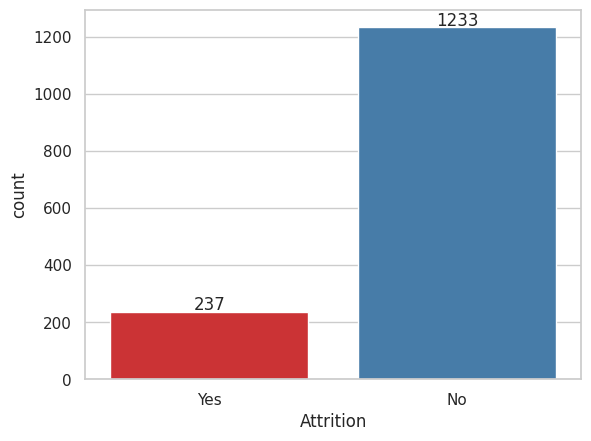

In [132]:
# Checking the Attrition Distribution

# Create the countplot
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='Attrition', data=dataset, label='Count')

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [133]:
dataset.groupby('Attrition').mean()

<ipython-input-133-3f4b83e0782b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Attrition').mean()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


<ipython-input-134-a10befbeeae3>:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


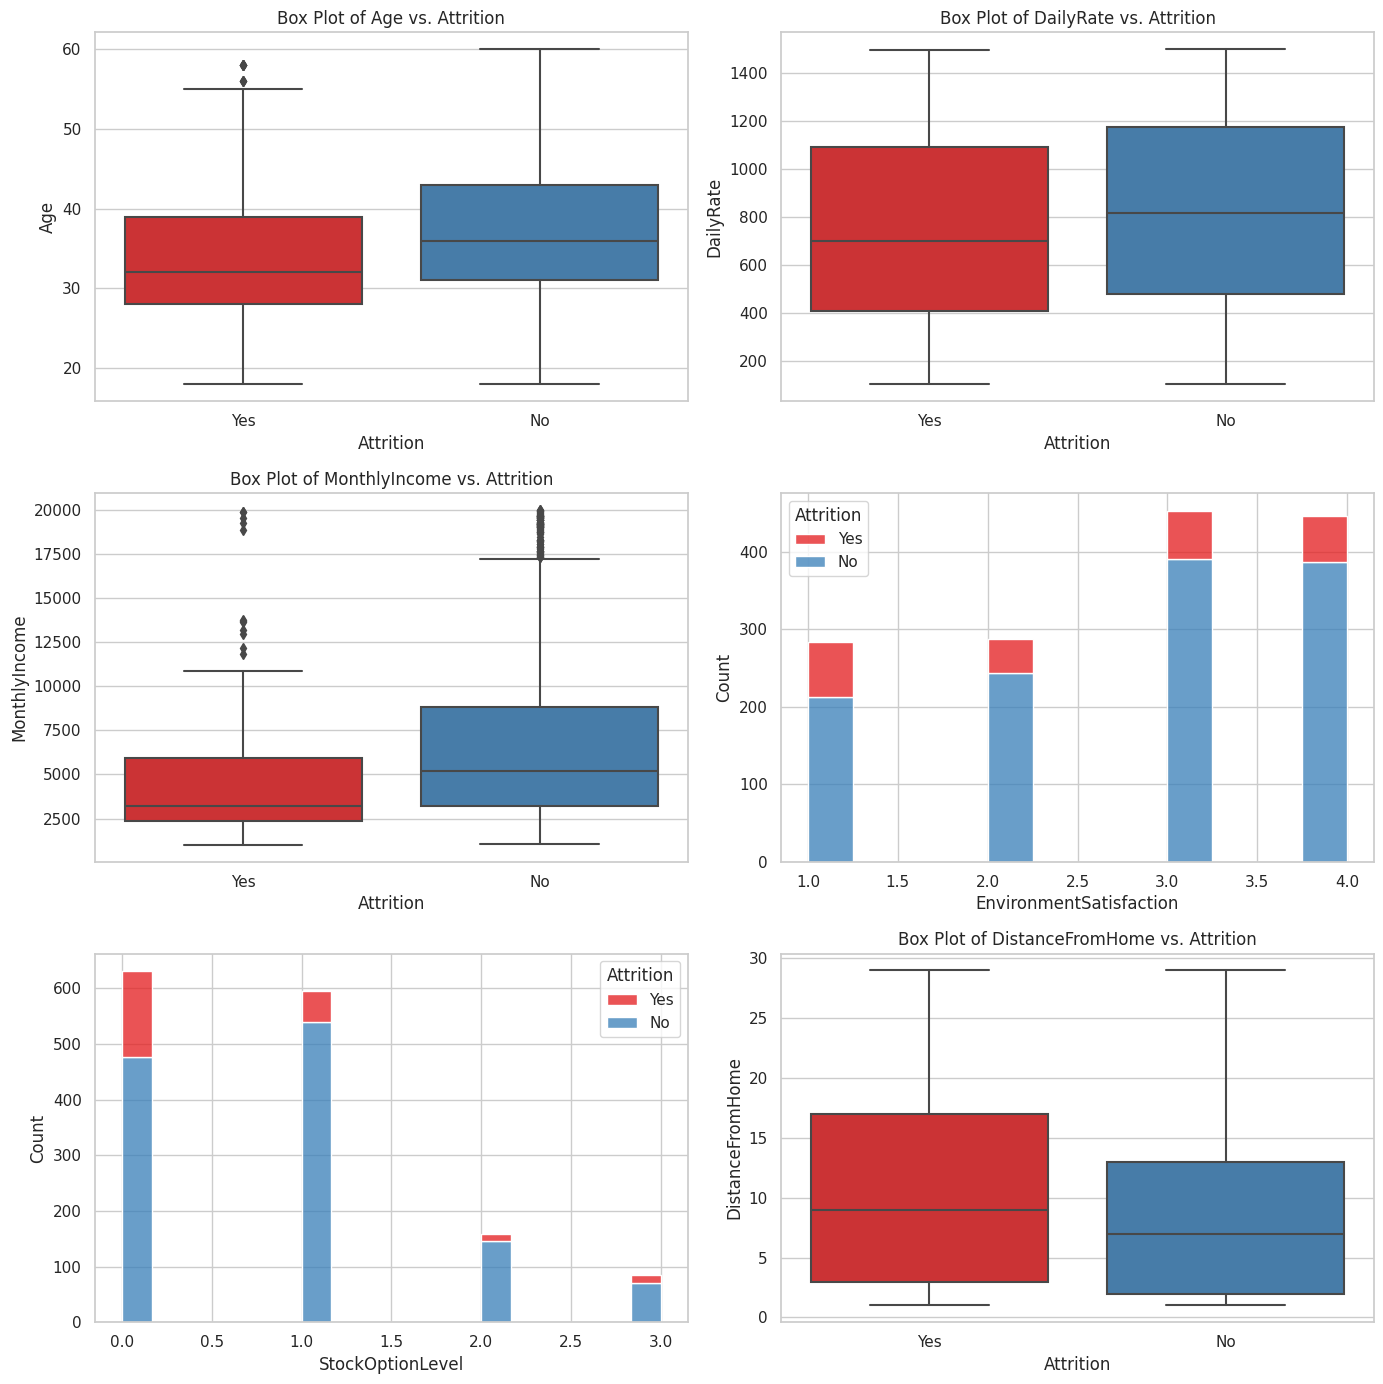

In [134]:
# Visualizing the numeric variables vs Attrition variable

# A 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14), constrained_layout=True)

# Subplot 1
sns.boxplot(x='Attrition', y='Age', data=dataset, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of Age vs. Attrition", fontsize=12)

# Subplot 2
sns.boxplot(x='Attrition', y='DailyRate', data=dataset, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of DailyRate vs. Attrition", fontsize=12)

# Subplot 3
sns.boxplot(x='Attrition', y='MonthlyIncome', data=dataset, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of MonthlyIncome vs. Attrition", fontsize=12)

# Subplot 4
sns.histplot(data=dataset, x='EnvironmentSatisfaction', hue='Attrition', multiple='stack', palette='Set1', ax=axes[1, 1])
plt.title("Histogram of EnvironmentSatisfaction vs. Attrition", fontsize=12)

# Subplot 5
sns.histplot(data=dataset, x='StockOptionLevel', hue='Attrition', multiple='stack', palette='Set1', ax=axes[2, 0])
plt.title("Histogram of StockOptionLevel vs. Attrition", fontsize=12)

# Subplot 6
sns.boxplot(x='Attrition', y='DistanceFromHome', data=dataset, palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title("Box Plot of DistanceFromHome vs. Attrition", fontsize=12)

# Adjust layout with vertical padding
plt.tight_layout()

# Show the plot
plt.show()

The graphs show that these employees are more prone to attrition:

- Younger age
- With a lower daily rate
- With a lower monthly income
- Working farther from home
- Having a lower Stock Option Level

<ipython-input-135-a404731472f1>:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


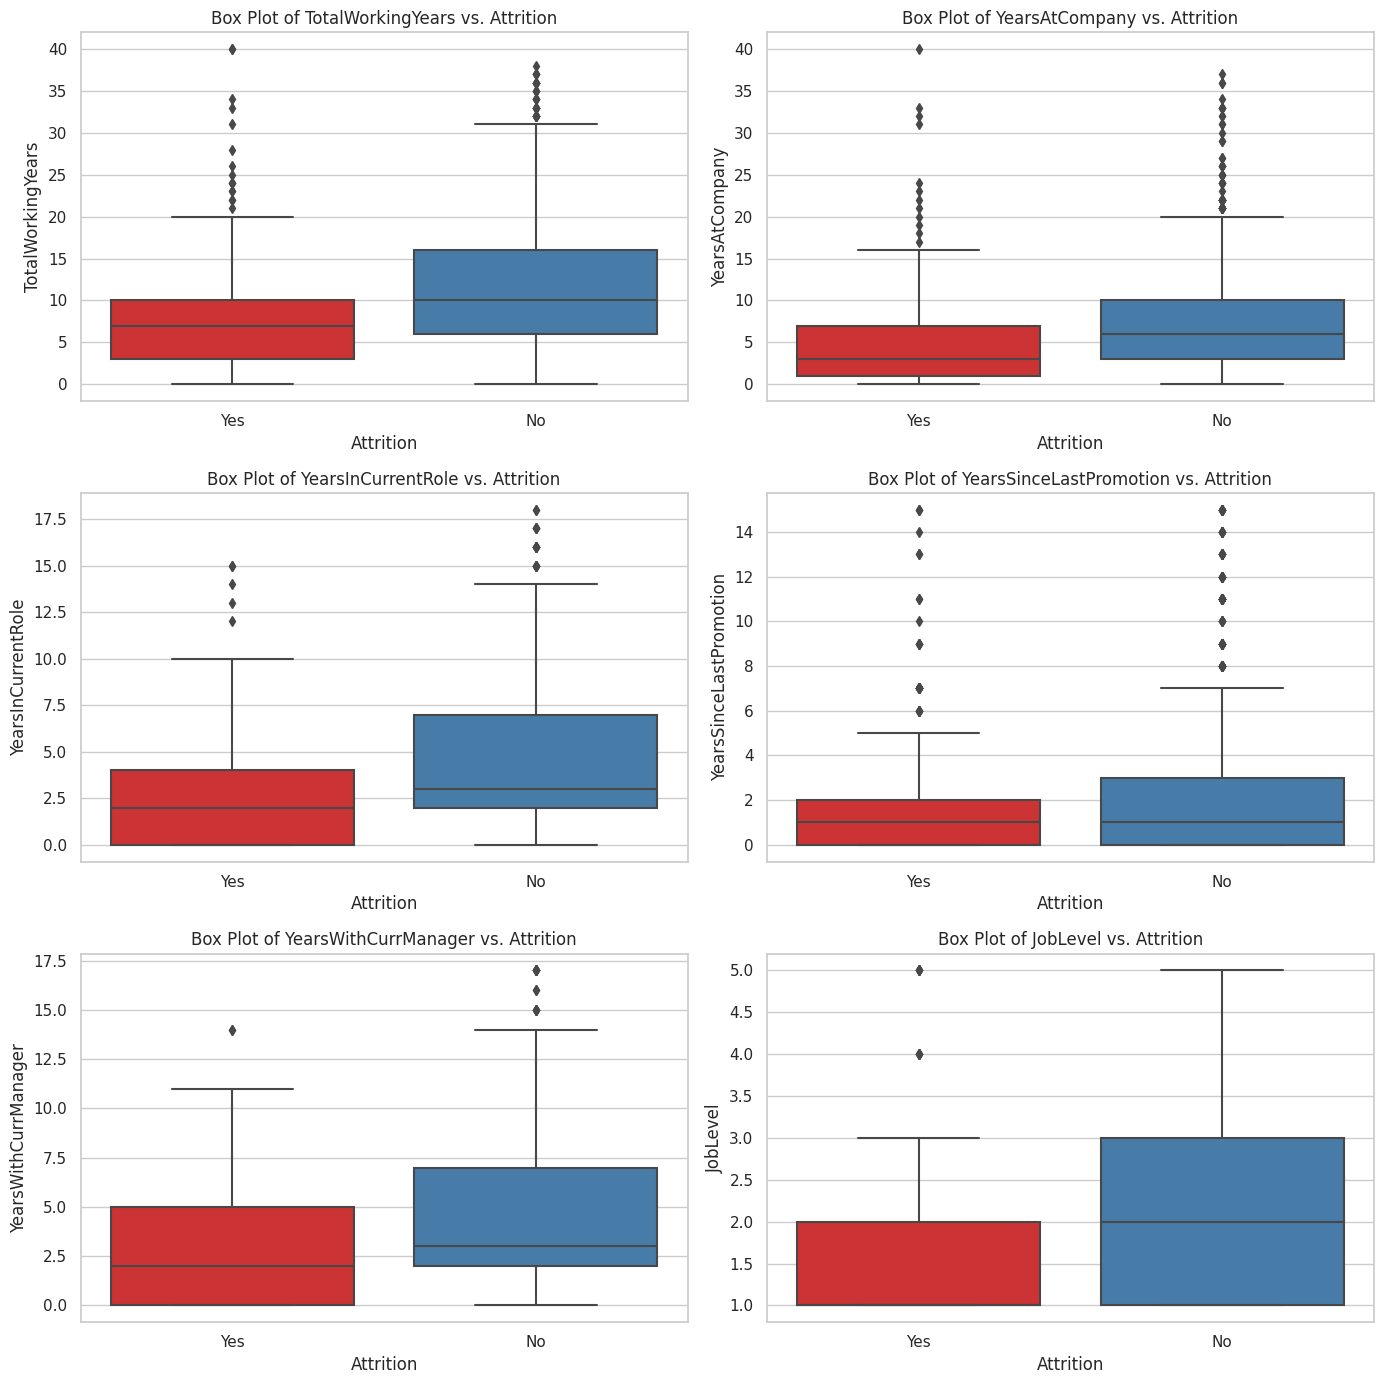

In [135]:
# Visualizing the numeric variables vs Attrition variable
# Here we are more interested with the variables that we can describe as "experience"

# A 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14), constrained_layout=True)

# Subplot 1
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=dataset, palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of TotalWorkingYears vs. Attrition", fontsize=12)

# Subplot 2
sns.boxplot(x='Attrition', y='YearsAtCompany', data=dataset, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of YearsAtCompany vs. Attrition", fontsize=12)

# Subplot 3
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=dataset, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of YearsInCurrentRole vs. Attrition", fontsize=12)

# Subplot 4
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=dataset, palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of YearsSinceLastPromotion vs. Attrition", fontsize=12)

# Subplot 5
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=dataset, palette='Set1', ax=axes[2, 0])
axes[2, 0].set_title("Box Plot of YearsWithCurrManager vs. Attrition", fontsize=12)

# Subplot 6
sns.boxplot(x='Attrition', y='JobLevel', data=dataset, palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title("Box Plot of JobLevel vs. Attrition", fontsize=12)

# Adjust layout with vertical padding
plt.tight_layout()

# Show the plot
plt.show()

The graphs show that these employees are more prone to attrition:

- Having less Total working years
- Having less Years it current company
- Having less Years in current role
- Having less Years with current manager
- Having lower Job level

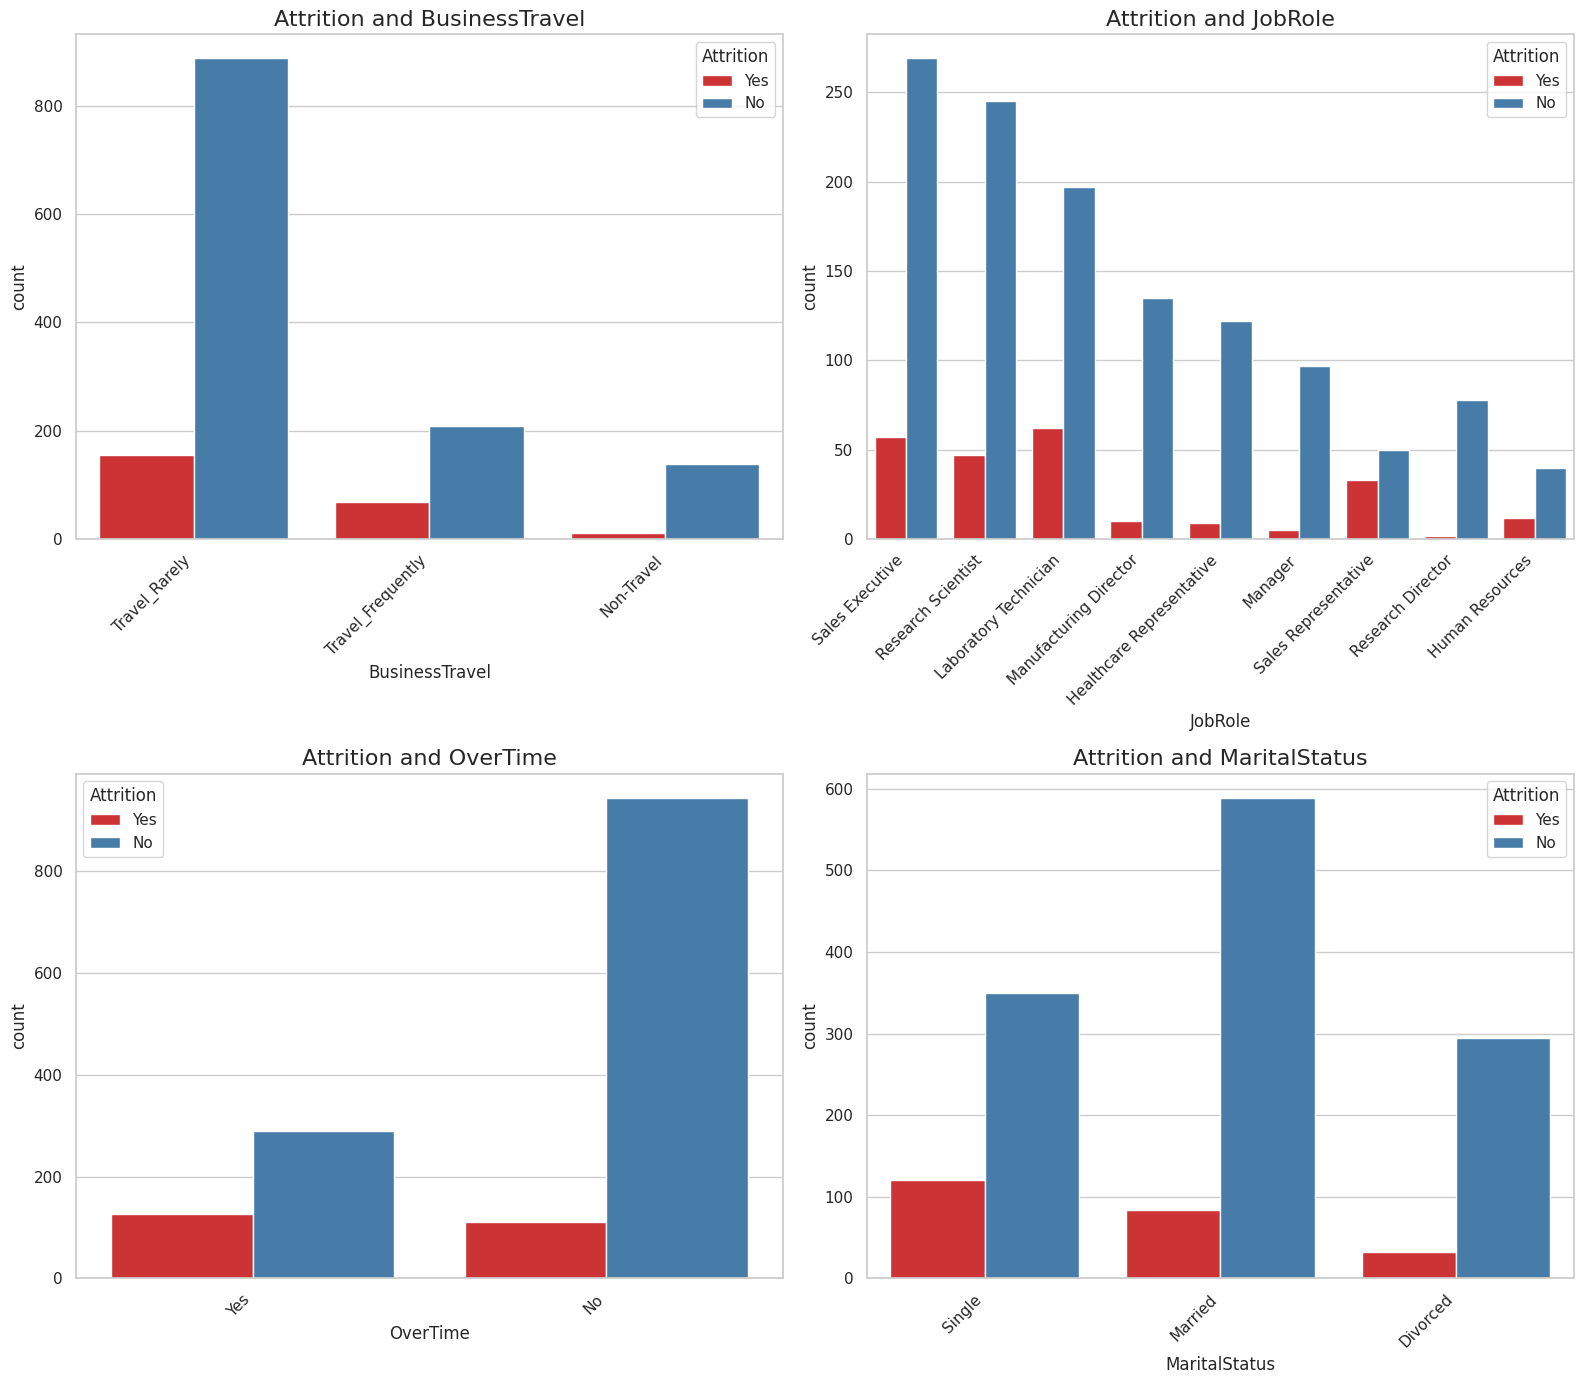

In [136]:
# Visualizing categorical variables vs Attrition variable

# A 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))

# Subplot 1
ax1 = sns.countplot(x='BusinessTravel', hue='Attrition', data=dataset, palette='Set1', ax=axes[0, 0])
ax1.set_title("Attrition and BusinessTravel", fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Subplot 2
ax2 = sns.countplot(x='JobRole', hue='Attrition', data=dataset, palette='Set1', ax=axes[0, 1])
ax2.set_title("Attrition and JobRole", fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

# Subplot 3
ax3 = sns.countplot(x='OverTime', hue='Attrition', data=dataset, palette='Set1', ax=axes[1, 0])
ax3.set_title("Attrition and OverTime", fontsize=16)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")

# Subplot 4
ax4 = sns.countplot(x='MaritalStatus', hue='Attrition', data=dataset, palette='Set1', ax=axes[1, 1])
ax4.set_title("Attrition and MaritalStatus", fontsize=16)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

These employees are more prone to attrition:

- Traveling frequently
- Working as Sales Representatives
- Working overtime
- Single


In [137]:
# One Hot Encoding

dataset = pd.get_dummies(data=dataset, drop_first=True)

In [138]:
# Checking the number of columns and their parameters

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

Text(0.5, 1.0, 'Correlation of Features with Class')

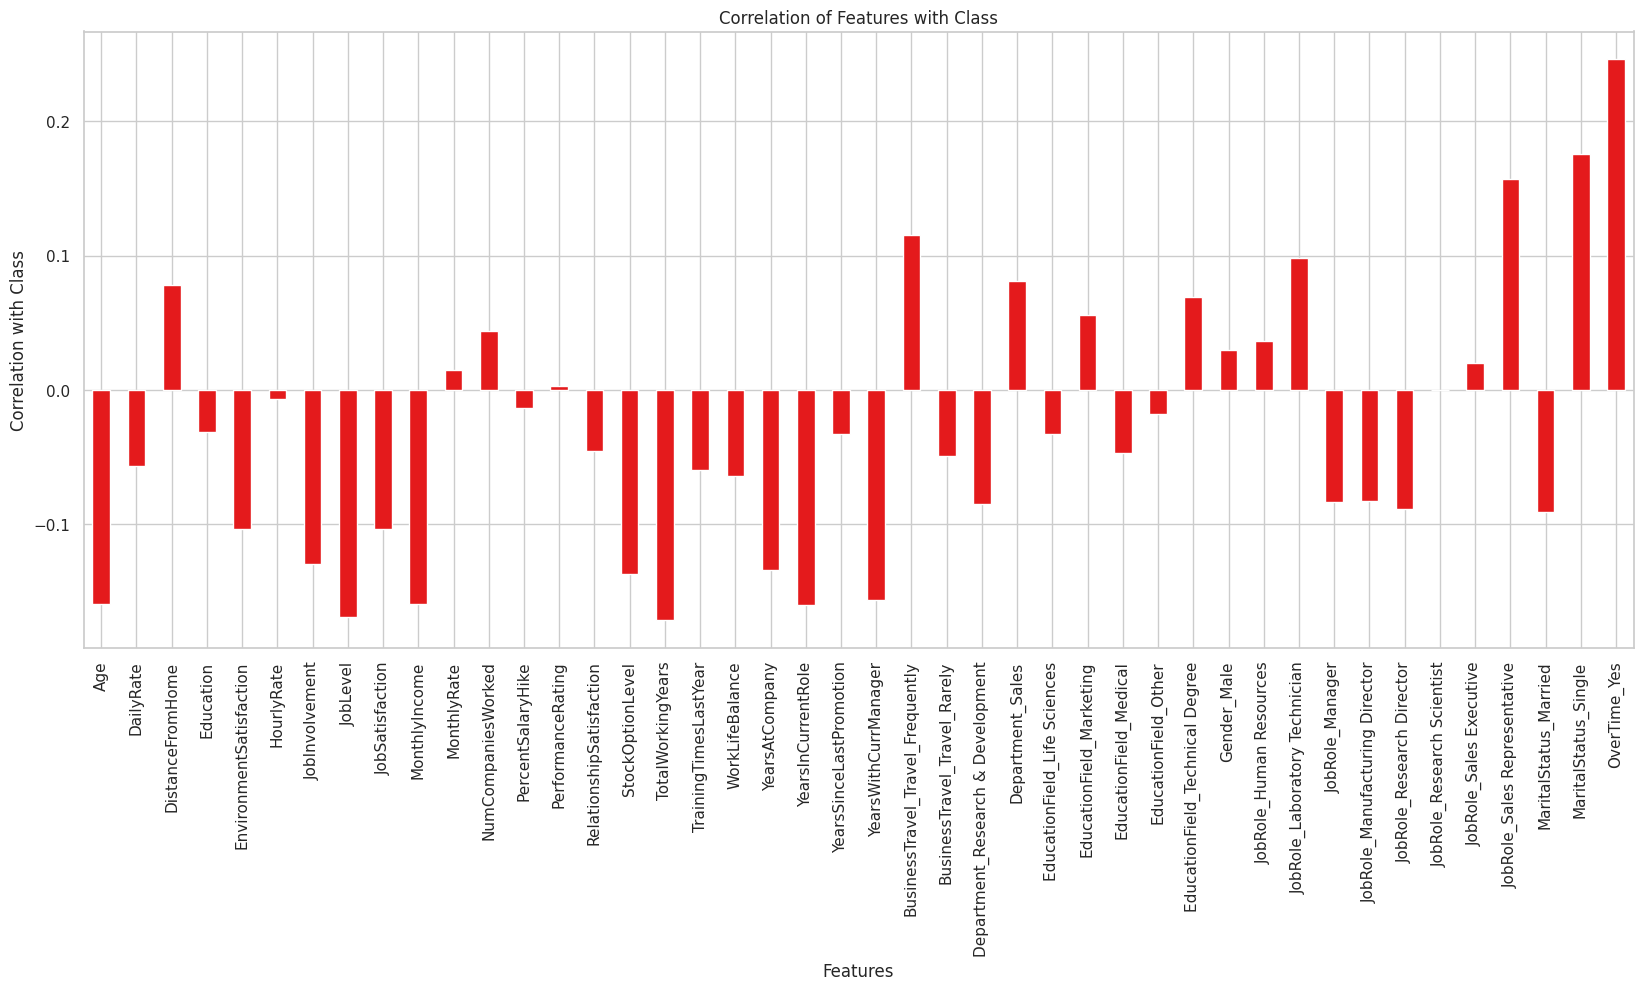

In [139]:
# Correlation Diagram

dataset_2 = dataset.drop(columns='Attrition_Yes')
dataset_2.corrwith(dataset['Attrition_Yes']).plot.bar(figsize=(20,8), grid=True)

plt.xlabel("Features")  # Label for the x-axis (features)
plt.ylabel("Correlation with Class")  # Label for the y-axis (correlation values)
plt.title("Correlation of Features with Class")  # Set the title for the bar plot

Here we've got the confirmation to our previous ideas:

These employees are more prone to attrition:

- Of younger age
- With a lower daily rate
- With a lower monthly income
- Working farther from home
- Having a lower Stock Option Level

- Having less Total working years
- Having less Years it current company
- Having less Years in current role
- Having less Years with current manager
- Having lower Job level

- Traveling frequently
- Working as Sales Representatives
- Working overtime
- Single




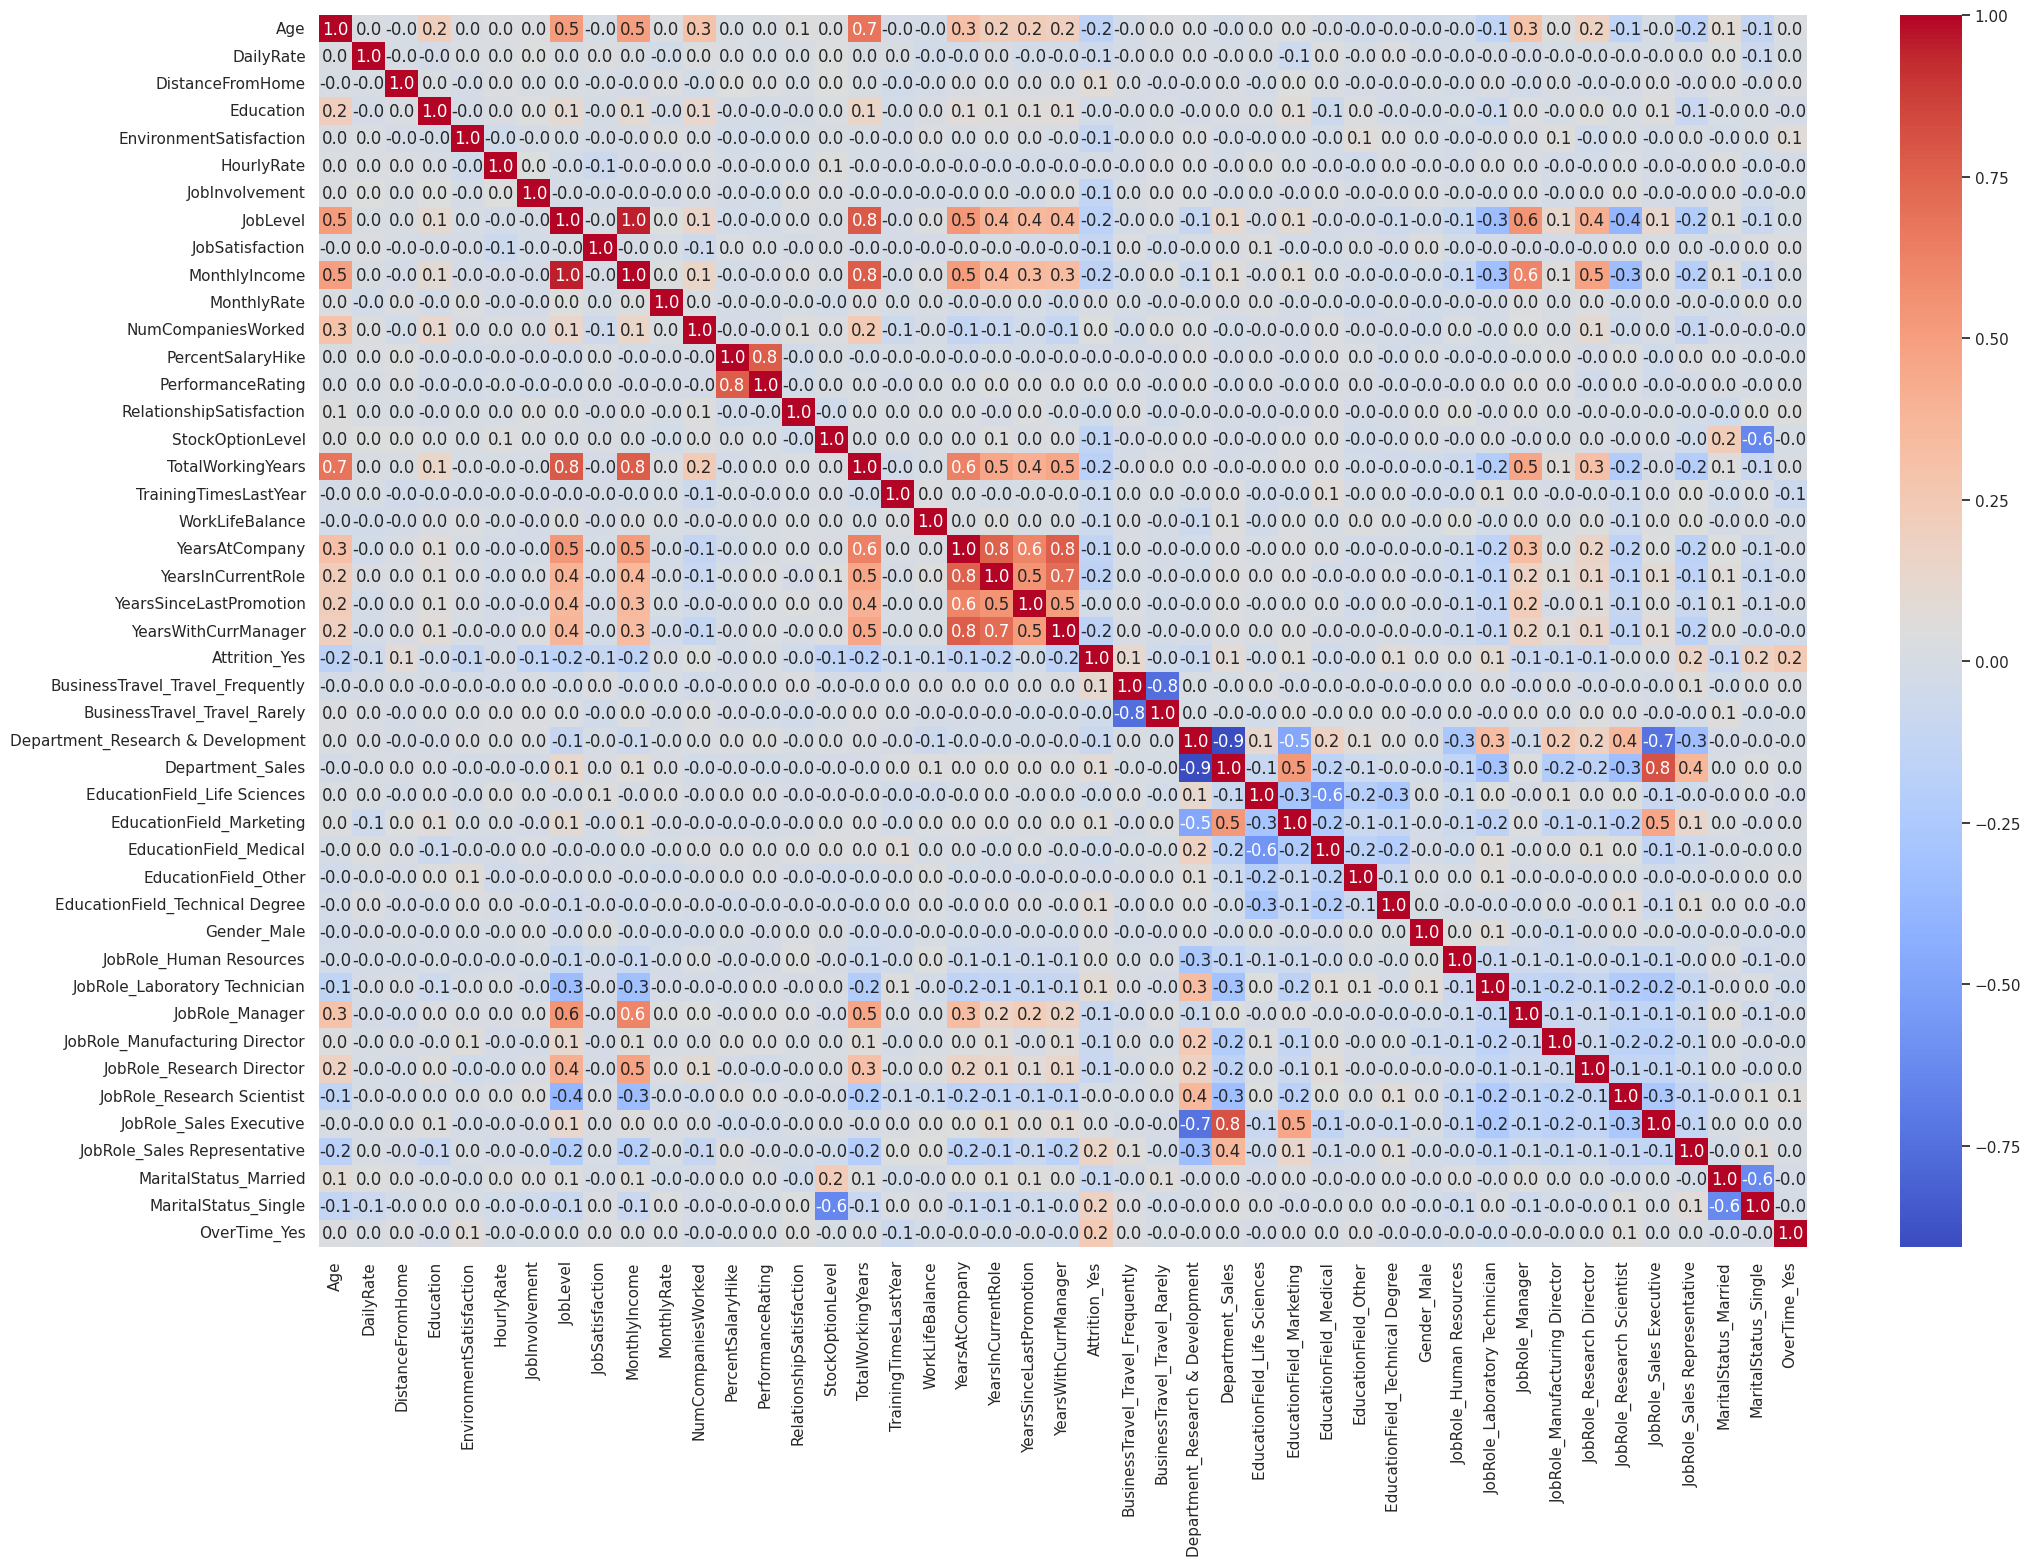

In [140]:
# Heatmap

# Calculate the correlation matrix
corr = dataset.corr()

# Set up the heatmap figure
plt.figure(figsize=(24, 16))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")

plt.show()

In [141]:
# We see very high correlation between MonthlyIncome and JobLevel

correlation = dataset['MonthlyIncome'].corr(dataset['JobLevel'])

print(f"Correlation between MonthlyRate and JobLevel: {correlation}")

Correlation between MonthlyRate and JobLevel: 0.950299913479845


In [142]:
# But it is not ablsolute

In [143]:
# Splitting the data

# Separate the input features (X) and the target variable (y)
X = dataset.drop(columns=['Attrition_Yes']) # X contains all columns except 'Attrition_Yes'
y = dataset['Attrition_Yes'] # y contains only the 'Attrition_Yes' column, which is the target variable

In [144]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [145]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8

In [146]:
# Splitting into testing and training sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [147]:
# Checking the shapes:

X_train.shape

(1176, 44)

In [148]:
X_test.shape

(294, 44)

In [149]:
y_train.shape

(1176,)

In [150]:
y_test.shape

(294,)

In [151]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [152]:
# Importing the logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Creating an instance of the logistic regression classifier
# Setting the random_state to ensure reproducibility of results
classifier_lr = LogisticRegression(random_state=0)

In [153]:
# Training the model

classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [154]:
# Making the prediction

y_pred = classifier_lr.predict(X_test)

In [155]:
# Loading the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(y_test, y_pred)

In [156]:
# Getting the results

results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.884354,0.575,0.741935,0.469388


In [157]:
# Checking the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[237   8]
 [ 26  23]]


In [158]:
# Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 87.67%
Standard Deviation is 2.63%


# Random Forest Classifier

In [159]:
# Importing the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier
# Setting the random_state to ensure reproducibility of results
classifier_rm = RandomForestClassifier(random_state=0)

In [160]:
# Training the model

classifier_rm.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [161]:
# Making the prediction

y_pred = classifier_rm.predict(X_test)

In [162]:
# Loading the metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [163]:
# Getting the results of Random Forest model fitting

model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.884354,0.575,0.741935,0.469388
1,Random Forest,0.857143,0.300,0.818182,0.183673


In [164]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[243   2]
 [ 40   9]]


In [165]:
# Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rm, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 85.63%
Standard Deviation is 1.59%


# XGB Classifier

In [166]:
# Importing the XGBClassifier from XGBoost library
from xgboost import XGBClassifier

# Creating an instance of the XGBClassifier
# Setting the random_state to ensure reproducibility of results
classifier_xgb = XGBClassifier(random_state=0)

In [167]:
# Training the model

classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [168]:
# Making the prediction

y_pred = classifier_xgb.predict(X_test)

In [169]:
# Loading the metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [170]:
# Getting the results of traning


model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.884354,0.575000,0.741935,0.469388
1,Random Forest,0.857143,0.300000,0.818182,0.183673
2,XGBoost,0.853741,0.394366,0.636364,0.285714


In [171]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[237   8]
 [ 35  14]]


In [172]:
# Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 87.33%
Standard Deviation is 1.76%


In [173]:
# Logistic Regression has shown the best result so we will use this model for predictions

# Checking the predictions

In [174]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [175]:
single_obs_0=[[41, 1102, 1, 2, 2, 94, 3, 2, 4, 5993, 19479, 8, 11, 3, 1, 0, 8, 0, 1, 6, 4, 0, 5, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]

In [176]:
classifier_lr.predict(single_obs_0)

array([1], dtype=uint8)

In [177]:
# Got correct prediction

In [178]:
single_obs_1=[[49, 279, 8, 1, 3, 61, 2, 2, 2, 5130, 24907, 1, 23, 4, 4, 1, 10, 3, 3, 10, 7, 1, 7, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

In [179]:
classifier_lr.predict(single_obs_1)

array([1], dtype=uint8)

In [180]:
# Got Correct prediction